In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Dataset=pd.read_csv('/content/Materialdata.csv')
x_set=Dataset.iloc[:,1:-1].values
y_set=Dataset.iloc[:,-1].values


In [ ]:
# Normalize the input features between -0.5 and +0.5
#
# X_min = np.min(X_pca)
# X_max = np.max(X_pca)
# X_scaled = -0.5 + ((X_pca - X_min) / (X_max - X_min)) * 1

# # Normalize the target variables between -0.99 and +0.99
# Y_min = np.min(y_set)
# Y_max = np.max(y_set)
# Y_scaled = -0.5 + ((y_set - Y_min) / (Y_max - Y_min)) * 1

# Standardize the input features using Scikit-learn's StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(x_set)
# Y_scaled = scaler.fit.transform(y_set)

# X_norm = MinMaxScaler(feature_range=(-0.5, 0.5))
# Y_norm = MinMaxScaler(feature_range=(-0.99, 0.99))
# y_set = y_set.reshape(-1,1)
# # Normalize input and target variables

# x_set[:,:] = X_norm.fit_transform(x_set[:,:])
# y_set = Y_norm.fit_transform(y_set)


# Normalize the input and target variables
x_scaler = MinMaxScaler(feature_range=(-0.5, 0.5))
y_scaler = MinMaxScaler(feature_range=(-0.99, 0.99))
x_set = x_scaler.fit_transform(x_set)
y_set = y_scaler.fit_transform(y_set.reshape(-1, 1)).flatten()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_set, y_set, test_size=1/3, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define the DNN architecture
model = Sequential([
    Dense(6, activation='relu', input_shape=(21,)),
    Dense(5, activation='relu'),
    Dense(4, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1)
])

# Define the SAE architecture for pre-training
sae_model = Sequential([
    Dense(21, activation='relu', input_shape=(21,)),
    Dense(6, activation='relu'),
    Dense(5, activation='relu'),
    Dense(4, activation='relu'),
    Dense(3, activation='relu')
])

# Perform pre-training
for i in range(1, 6):
    sae_model.layers[i].set_weights(model.layers[i-1].get_weights())

    sae_model.compile(optimizer='adam', loss='mse')
    sae_model.fit(x_train[:, :i], x_train[:, :i], epochs=100, batch_size=20, verbose=0)

    model.layers[i-1].set_weights(sae_model.layers[i].get_weights())

# Perform fine-tuning
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_percentage_error'])
model.fit(x_train, y_train, epochs=1000, batch_size=20, validation_data=(x_test, y_test))


ValueError: ignored

In [ ]:
# input_shape=(21,)
# Output_shape = 1

# # Define the model architecture
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(20, activation='tanh', input_shape=input_shape),
#     tf.keras.layers.Dense(Output_shape , activation='linear')
# ])



# # Compile the model
# model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
#               loss='mse',
#               metrics=['mean_absolute_percentage_error'])
# model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1000, batch_size=20)



Epoch 1/1000
17/17 [==============================] - 1s 11ms/step - loss: 0.2755 - mean_absolute_percentage_error: 177.0213 - val_loss: 0.2008 - val_mean_absolute_percentage_error: 116.7028
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1463 - mean_absolute_percentage_error: 120.0923 - val_loss: 0.1455 - val_mean_absolute_percentage_error: 91.3682
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.1013 - mean_absolute_percentage_error: 112.7004 - val_loss: 0.1460 - val_mean_absolute_percentage_error: 82.8335
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.0951 - mean_absolute_percentage_error: 110.1767 - val_loss: 0.1449 - val_mean_absolute_percentage_error: 73.7022
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.0956 - mean_absolute_percentage_error: 94.0017 - val_loss: 0.1375 - val_mean_absolute_percentage_error: 76.8458
Epoch 6/1000
17/17 [==============================] - 

6/6 [==============================] - 0s 2ms/step


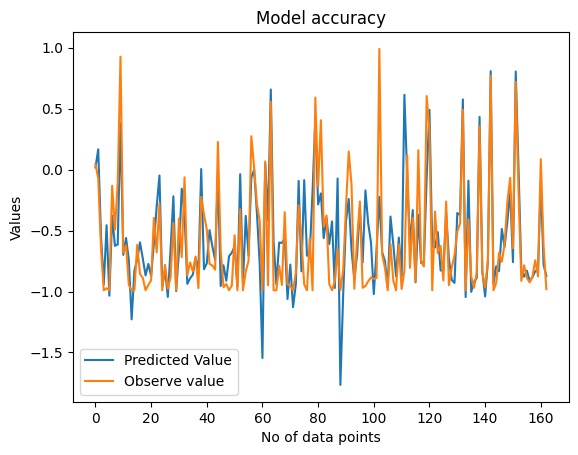

In [ ]:
# Plot the Model Acuracy
plt.plot(model.predict([x_test]), label='Predicted Value')
plt.plot(y_test, label='Observe value')
plt.title('Model accuracy')
plt.xlabel('No of data points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
model.predict([x_test[1].reshape(1,21)])
# print([x_test[0].reshape(1,21)])


1/1 [==============================] - 0s 14ms/step


array([[0.16640848]], dtype=float32)

In [ ]:
print(y_test[1])

[-0.07283938]


SNN with PCA applied that reduce the feature from 21 to 15 and then the model is trained..

In [ ]:
Dataset=pd.read_csv('/content/Materialdata.csv')
x_set=Dataset.iloc[:,1:-1].values
y_set=Dataset.iloc[:,-1].values

In [ ]:
# Define the number of components to keep after PCA
n_components = 15

# Create a PCA object with the specified number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the input data and transform the data
X_pca = pca.fit_transform(x_set)
# print(pca.explained_variance_ratio_)

# # Print the total variance explained by the selected number of components
# print('Total variance explained:', sum(pca.explained_variance_ratio_))

X_norm = MinMaxScaler(feature_range=(-0.5, 0.5))
Y_norm = MinMaxScaler(feature_range=(-0.99, 0.99))
y_set = y_set.reshape(-1,1)
# Normalize input and target variables

X_pca[:,:] = X_norm.fit_transform(X_pca[:,:])
y_scaled = Y_norm.fit_transform(y_set)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_scaled, test_size=1/3, random_state=42)

input_shape=(15,)
Output_shape = 1

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='tanh', input_shape=input_shape),
    tf.keras.layers.Dense(Output_shape , activation='linear')
])

optimizer = tf.keras.optimizers.Adam(lr=0.0001)

# Compile the model
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mean_absolute_percentage_error'])

# Print the model summary
model.summary()

history=model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=1000, batch_size=32)



NameError: ignored

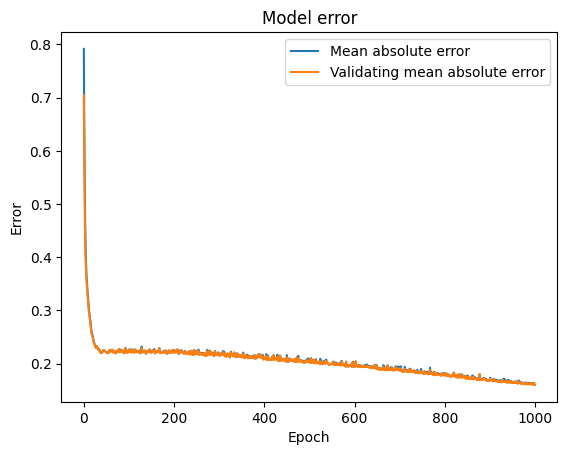

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['mean_absolute_error'], label='Mean absolute error')
plt.plot(history.history['val_mean_absolute_error'], label='Validating mean absolute error')
plt.title('Model error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.show()